In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.stats as stats
from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter


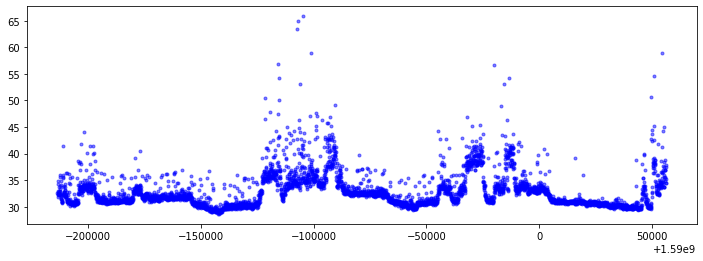

In [38]:
#Read Data

#Convert to timestamp
def to_timestamp(x):
    return x.timestamp()

#file1 = sys.argv[1]
file1 = "sysinfo.csv"
cpu_data = pd.read_csv(file1, header = 0, names=['timestamp', 'temperature', 'sys_load_1', 'cpu_percent', 'cpu_freq', 'fan_rpm'], parse_dates = ['timestamp'])
cpu_data['timestamp'] = cpu_data['timestamp'].apply(to_timestamp)

cpu_data


#plot function
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha = 0.5, label="data points")
#plt.savefig('cpu.svg') # for final submisstion

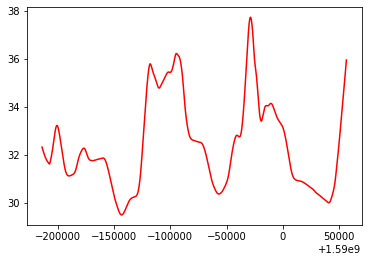

In [39]:
#LOESS Smoothing
loess_smoothed = lowess(cpu_data.temperature, cpu_data.timestamp, 0.05)
plt.plot(cpu_data['timestamp'] , loess_smoothed[:, 1], 'r-', label="LOESS Smoothingr")

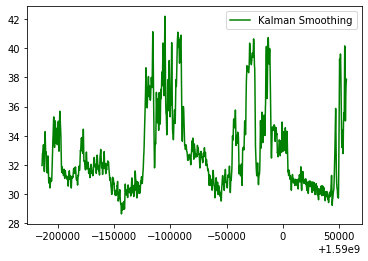

In [40]:
#Kalman Smoothing
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1', 'fan_rpm']]

initial_state = kalman_data.iloc[0]
# Put standard deviation in the covariance matrix.
#https://ggbaker.ca/data-science/content/filtering.html
kalman_std = kalman_data.std()
observation_covariance = np.diag([kalman_std[0],kalman_std[1],kalman_std[2],kalman_std[3]])**2  #Todo: shouldn't be zero

transition_covariance = np.diag([0.2,0.2,0.2,0.2])**2 #Todo: shouldnt be zero
transition = [[0.97,0.5,0.2,-0.001], [0.1,0.4, 2.2, 1], [0,0,0.95,0], [0,0,0,1]] #Todo: shouldnt be zero

kf = KalmanFilter(
    initial_state_mean = initial_state,
    initial_state_covariance = observation_covariance,
    observation_covariance = observation_covariance,
    transition_covariance = transition_covariance,
    transition_matrices = transition 
    
)
kalman_smoothed, _ = kf.smooth(kalman_data)
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-', label = "Kalman Smoothing")
plt.legend()
plt.savefig('cpu.')